# 飞桨常规赛：MarTech Challenge 点击反欺诈预测 11月第5名方案

# 一.方案介绍：

## 1.1 赛题介绍
广告欺诈是数字营销需要面临的重要挑战之一，点击会欺诈浪费广告主大量金钱，同时对点击数据会产生误导作用。点击欺诈预测适用于各种信息流广告投放，banner广告投放，以及百度网盟平台，帮助商家鉴别点击欺诈，锁定精准真实用户。

本次比赛提供了约50万次点击数据，数据中对某些特征含义进行了隐藏并进行了脱敏处理。测试集中提供了会话sid及该会话的各维度特征值，选手需要基于训练集得出的模型进行预测，判断该会话sid是否为正常点击，还是作弊行为。

比赛传送门：[常规赛：MarTech Challenge 点击反欺诈预测](https://aistudio.baidu.com/aistudio/competition/detail/52)

## 1.2 项目说明：

点击反欺诈预测是一个二分类问题，判断会话是否为正常点击，还是作弊行为。本次数据信息上数字特征列较多，而树模型对结构化的数据可以更好地拟合，可以很好适用于数据量不大且类别信息较多时。本项目主要基于Catboost树模型结合特征工程构建点击反欺诈预测模型，于8月取得了第一名的成绩。

> github项目地址：[https://github.com/hchhtc123/Click-anti-fraud-forecast](https://github.com/hchhtc123/Click-anti-fraud-forecast)

> 运行说明： 本项目Baseline的运行使用CPU环境即可，对内存消耗不大，无需高级版GPU环境。

感谢大佬的开源分享：[飞桨常规赛：点击反欺诈预测-8月第1名方案](https://aistudio.baidu.com/aistudio/projectdetail/5057514)

![](https://ai-studio-static-online.cdn.bcebos.com/576d21c14c374c849aae6909719fa3c12621581cc9a14d70a8c98fcf46a0b2cc)


# 二.数据查看与分析

In [1]:
# 解压比赛数据集
# !unzip /home/aistudio/data/data105017/data.zip

In [2]:
# 使用pandas读取数据
import pandas as pd
train = pd.read_csv('/home/aistudio/train.csv')  # 训练数据
test = pd.read_csv('/home/aistudio/test.csv')    # 测试数据

In [3]:
# 查看训练数据，共500000条、21列
train

,Unnamed: 0,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,...,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,0,316361,1199,46000.0,0.0,0.0,0.0,1,NaN,104,...,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,1,135939,893,0.0,0.0,0.0,0.0,1,NaN,19,...,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,2,399254,821,0.0,760.0,0.0,360.0,1,NaN,559,...,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,3,68983,1004,46000.0,2214.0,0.0,1080.0,0,NaN,129,...,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,4,288999,1076,46000.0,2280.0,0.0,1080.0,1,zh-CN,64,...,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,392477,1028,46000.0,1920.0,3.0,1080.0,1,zh-CN,144,...,Android,7.1.2,25,1546078,1.559834e+12,7,861755946,79,140647032,373
499996,499996,346134,1001,0.0,1424.0,0.0,720.0,0,NaN,29,...,android,8.1.0,0,1480612,1.559814e+12,3,1714444511,23,2745131047,525
499997,499997,499635,761,46000.0,1280.0,0.0,720.0,0,NaN,54,...,android,6.0.1,9,1698442,1.559676e+12,0,3843262581,25,1326115882,810
499998,499998,239786,917,46001.0,960.0,0.0,540.0,0,zh_CN,109,...,android,5.1.1,0,1331155,1.559840e+12,0,1984296118,225,1446741112,772


In [4]:
# 查看训练数据文件信息及每列的类型，由于数据量较小故并无考虑做较多内存优化
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  500000 non-null  int64  
 1   android_id  500000 non-null  int64  
 2   apptype     500000 non-null  int64  
 3   carrier     500000 non-null  float64
 4   dev_height  500000 non-null  float64
 5   dev_ppi     500000 non-null  float64
 6   dev_width   500000 non-null  float64
 7   label       500000 non-null  int64  
 8   lan         316720 non-null  object 
 9   media_id    500000 non-null  int64  
 10  ntt         500000 non-null  float64
 11  os          500000 non-null  object 
 12  osv         493439 non-null  object 
 13  package     500000 non-null  int64  
 14  sid         500000 non-null  int64  
 15  timestamp   500000 non-null  float64
 16  version     500000 non-null  object 
 17  fea_hash    500000 non-null  object 
 18  location    500000 non-null  int64  
 19  fe

| 字段 | 类型| 说明|
|---|---|---|
|sid|string|样本id/请求会话sid| 
|package|string|媒体信息，包名（已加密）| 
|version|string|媒体信息，app版本| 
|android_id|string|媒体信息，对外广告位ID（已加密）| 
|media_id|string|媒体信息，对外媒体ID（已加密）| 
|apptype|int|媒体信息，app所属分类| 
|timestamp|bigint|请求到达服务时间，单位ms| 
|location|int|用户地理位置编码（精确到城市）| 
|fea_hash|int|用户特征编码（具体物理含义略去）| 
|fea1_hash|int|用户特征编码（具体物理含义略去）| 
|cus_type|int|用户特征编码（具体物理含义略去）| 
|ntt|int|网络类型 0-未知, 1-有线网, 2-WIFI, 3-蜂窝网络未知, 4-2G, 5-3G, 6–4G| 
|carrier|string|设备使用的运营商 0-未知, 46000-移动, 46001-联通, 46003-电信| 
|os|string|操作系统，默认为android| 
|osv|string|操作系统版本| 
|lan|string|设备采用的语言，默认为中文| 
|dev_height|int|设备高| 
|dev_width|int|设备宽| 
|dev_ppi|int|屏幕分辨率| 

In [5]:
# 检测每列缺失值情况
train.isnull().sum()

Unnamed: 0         0
android_id         0
apptype            0
carrier            0
dev_height         0
dev_ppi            0
dev_width          0
label              0
lan           183280
media_id           0
ntt                0
os                 0
osv             6561
package            0
sid                0
timestamp          0
version            0
fea_hash           0
location           0
fea1_hash          0
cus_type           0
dtype: int64

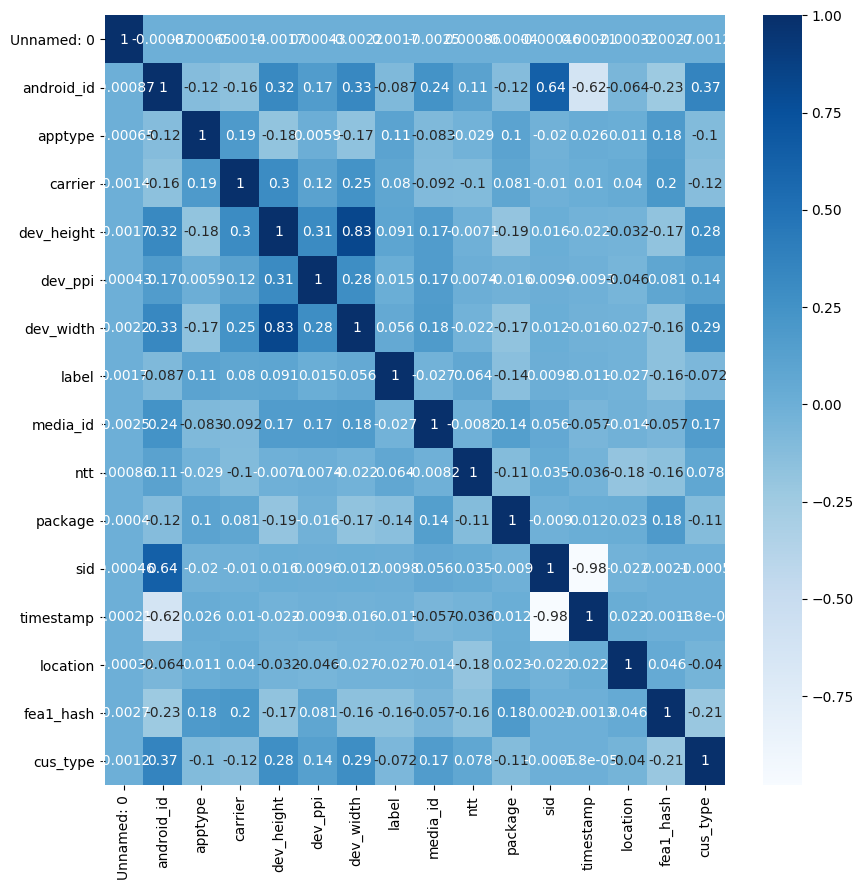

In [6]:
# 对特征列进行相关性分析
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),cbar=True,annot=True,cmap='Blues')

# 三.基于Catboost树模型构建基线模型

在树模型选择上，本赛题个人尝试使用过LightGBM和XGBoost但效果都没有Catboost模型好。

Catboost（ Categorical Features+Gradient Boosting）采用的策略在降低过拟合的同时保证所有数据集都可用于学习。性能卓越、鲁棒性与通用性更好、易于使用而且更实用。据其介绍 Catboost 的性能可以匹敌任何先进的机器学习算法，其具有以下优势：

（1）CatBoost 提供了比 XGBoost 更高的准确性和和更短的训练时间；

（2）支持即用的分类特征，因此我们不需要对分类特征进行预处理（例如，通过 LabelEncoding 或 OneHotEncoding）。事实上，CatBoost 的文档明确地说明不要在预处理期间使用热编码，因为“这会影响训练速度和最终的效果”；

（3）通过执行有序地增强操作，可以更好地处理过度拟合，尤其体现在小数据集上；

（4）支持即用的 GPU 训练（只需设置参数task_type =“GPU”）；

（5）可以处理缺失的值；

## 3.1 环境准备

In [ ]:
# 下载catboost库
!pip install catboost

In [ ]:
# 导入所需的第三方库
import sys
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.model_selection import GroupKFold, KFold, StratifiedKFold
from catboost import CatBoostClassifier
import gc
import re
import warnings
warnings.filterwarnings("ignore")

## 3.2 特征工程

1.特征交互：特征和特征之间组合、特征和特征之间衍生

2.特征编码：one-hot编码、label-encode编码等

3.特征选择：通过对特征重要性及相关性的分析，筛选掉无用的特征

特征工程很大程度上是在帮助模型学习，数据和特征决定模型上限。在模型学习不好的地方或者难以学习的地方，通过特征工程的方式帮助其学习，通过人为筛选、人为构建组合特征让模型原本很难学好的东西可以更加容易地进行学习、进而拿到更好的效果。

In [ ]:
# 定义所需的特征工程处理函数：

# 数据特征处理和类别转换
def data_preprocessing(train, test1):
    df1 = train.drop(['Unnamed: 0'], axis=1)
    df2 = test1.drop(['Unnamed: 0'], axis=1)
    df2["label"] = -1
    li = []
    for df_index in [df1,df2]:
        # 类型转换
        for col in ["android_id", "apptype", "carrier", "ntt", "media_id", "cus_type", "package", 'fea1_hash', "location"]:
            df_index[col] = df_index[col].astype("object")
        for col in ["fea_hash"]:
            df_index[col] = df_index[col].map(lambda x: 0 if len(str(x)) > 16 else int(x))
        for col in ["dev_height", "dev_ppi", "dev_width", "fea_hash", "label"]:
            df_index[col] = df_index[col].astype("int64")
        # 时间特征处理和转换
        df_index["truetime"] = pd.to_datetime(df_index['timestamp'], unit='ms', origin=pd.Timestamp('1970-01-01'))
        df_index["day"] = df_index.truetime.dt.day
        df_index["hour"] = df_index.truetime.dt.hour
        df_index["minute"] = df_index.truetime.dt.minute
        df_index.set_index("sid", drop=True, inplace=True)
        df_index.dev_height[df_index.dev_height == 0] = None
        df_index.dev_width[df_index.dev_width == 0] = None
        df_index.dev_ppi[df_index.dev_ppi == 0] = None
        li.append(df_index)
    df2["label"] = None
    return li

# 类别预处理
def process_category(df1, df2, col):
    le = preprocessing.LabelEncoder()  # 特征编码
    df1[col] = le.fit_transform(df1[col])
    df1[col] = df1[col].astype("object")
    df2[col] = le.transform(df2[col])
    df2[col] = df2[col].astype("object")
    return df1, df2


def dict_category(df1, df2, col, dict1):
    print(col, dict1)
    df1[col] = df1[col].map(dict1)
    df1[col] = df1[col].astype("object")
    df2[col] = df2[col].map(dict1)
    df2[col] = df2[col].astype("object")
    return df1, df2

def filter_value(df1, df2, col, top, other=-1):
    set1 = set(df1[col].value_counts().head(top).index)
    def process_temp(x):
        if x in set1:
            return x
        else:
            return other
    df1[col] = df1[col].apply(process_temp)
    df2[col] = df2[col].apply(process_temp)
    return df1, df2

def special_category(df1, df2, col):
    if col == "apptype":
        df1, df2 = filter_value(df1, df2, col, 75, -1)
    if col == "media_id":
        df1, df2 = filter_value(df1, df2, col, 200, -1)
    if col == "version":
        df2[col] = df2[col].replace("20", "0").replace("21", "0")
    if col == "lan":
        def foreign_lan(x):
            set23 = {'zh-CN', 'zh', 'cn', 'zh_CN', 'Zh-CN', 'zh-cn', 'ZH', 'CN', 'zh_CN_#Hans'}
            if x in set23:
                return 0
            elif x == "unk":
                return 2
            else:
                return 1
        df1["vpn"] = df1["lan"].apply(foreign_lan)
        df2["vpn"] = df2["lan"].apply(foreign_lan)
        set12 = {'zh-CN', 'zh', 'cn', 'zh_CN', 'Zh-CN', 'zh-cn', 'ZH', 'CN', 'tw', 'en', 'zh_CN_#Hans', 'ko'}
        def process_lan(x):
            if x in set12:
                return x
            else:
                return "unk"
        df1[col] = df1[col].apply(process_lan)
        df2[col] = df2[col].apply(process_lan)
    if col == "package":
        df1, df2 = filter_value(df1, df2, col, 800, -1)
    if col == "fea1_hash":
        df1, df2 = filter_value(df1, df2, col, 850, -1)
    if col == "fea_hash":
        df1, df2 = filter_value(df1, df2, col, 850, -1)
    df1, df2 = process_category(df1, df2, col)
    return df1, df2


def feature(df1, df2):
    def divided(x):
        if x % 40 == 0:
            return 2
        elif not x:
            return 1
        else:
            return 0

    # 特征构造
    df1["160_height"] = df1.dev_height.apply(divided)
    df2["160_height"] = df2.dev_height.apply(divided)
    df1["160_width"] = df1.dev_width.apply(divided)
    df2["160_width"] = df2.dev_width.apply(divided)
    df1["160_ppi"] = df1.final_ppi.apply(divided)
    df2["160_ppi"] = df2.final_ppi.apply(divided)
    df1["hw_ratio"] = df1.dev_height / df1.dev_width
    df2["hw_ratio"] = df2.dev_height / df2.dev_width
    df1["hw_matrix"] = df1.dev_height * df1.dev_width
    df2["hw_matrix"] = df2.dev_height * df2.dev_width
    df1["inch"] = (df1.dev_height ** 2 + df1.dev_width ** 2) ** 0.5 / df1.final_ppi
    df2["inch"] = (df2.dev_height ** 2 + df2.dev_width ** 2) ** 0.5 / df2.final_ppi
    return df1, df2


def rf_cast(df1, df2):
    c1 = df1.dev_width.notnull()
    c2 = df1.dev_height.notnull()
    c3 = df1.dev_ppi.isna()
    c4 = df1.dev_ppi.notnull()
    df1["mynull1"] = c1 & c2 & c3
    df1["mynull2"] = c1 & c2 & c4

    predict = df1[
        ["apptype", "carrier", "dev_height", "dev_ppi", "dev_width", "media_id", "ntt", "mynull1", "mynull2"]]

    df_notnans = predict[predict.mynull2 == True]

    # 75训练25预测
    X_train, X_test, y_train, y_test = train_test_split(
        df_notnans[["apptype", "carrier", "dev_height", "dev_width", "media_id", "ntt"]], df_notnans["dev_ppi"],
        train_size=0.75, random_state=6)
    
    # 随机森林分类
    regr_multirf = RandomForestClassifier(n_estimators=100, max_depth=40, random_state=0, n_jobs=-1)
    regr_multirf.fit(X_train, y_train)
    score = regr_multirf.score(X_test, y_test)
    print("prediction score is {:.2f}%".format(score * 100))
    df_nans = predict[predict.mynull1 == True].copy()
    df_nans["dev_ppi_pred"] = regr_multirf.predict(
        df_nans[["apptype", "carrier", "dev_height", "dev_width", "media_id", "ntt"]])
    df1 = pd.merge(df1, df_nans[["dev_ppi_pred"]], on="sid", how="left")
    c1 = df2.dev_width.notnull()
    c2 = df2.dev_height.notnull()
    c3 = df2.dev_ppi.isna()
    c4 = df2.dev_ppi.notnull()
    df2["mynull1"] = c1 & c2 & c3
    df2["mynull2"] = c1 & c2 & c4
    predict_test = df2[
        ["apptype", "carrier", "dev_height", "dev_ppi", "dev_width", "media_id", "ntt", "mynull1", "mynull2"]]
    df_nans = predict_test[predict_test.mynull1 == True].copy()
    df_nans["dev_ppi_pred"] = regr_multirf.predict(
        df_nans[["apptype", "carrier", "dev_height", "dev_width", "media_id", "ntt"]])
    df2 = pd.merge(df2, df_nans[["dev_ppi_pred"]], on="sid", how="left")

    def recol_ppi(df):
        a = df.dev_ppi.fillna(0).values
        b = df.dev_ppi_pred.fillna(0).values
        c = []
        # print(a,b)
        for i in range(len(a)):
            c.append(max(a[i], b[i]))
        c = np.array(c)
        df["final_ppi"] = c
        df["final_ppi"][df["final_ppi"] == 0] = None
        return df

    df1 = recol_ppi(df1)
    df2 = recol_ppi(df2)
    gc.collect()
    return df1, df2

def process_osv(df1, df2):
    def process_osv1(x):
        x = str(x)
        if not x:
            return -1
        elif x.startswith("Android"):
            x = str(re.findall("\d{1}\.*\d*\.*\d*", x)[0])
            return x
        elif x.isdigit():
            return x
        else:
            try:
                x = str(re.findall("\d{1}\.\d\.*\d*", x)[0])
                return x
            except:
                return 0

    df1.osv = df1.osv.apply(process_osv1)
    df2.osv = df2.osv.apply(process_osv1)
    set3 = set(df1["osv"].value_counts().head(70).index)

    def process_osv2(x):
        if x in set3:
            return x
        else:
            return 0

    df1["osv"] = df1["osv"].apply(process_osv2)
    df2["osv"] = df2["osv"].apply(process_osv2)

    le8 = preprocessing.LabelEncoder()
    df1.osv = le8.fit_transform(df1.osv.astype("str"))
    df1["osv"] = df1["osv"].astype("object")

    df2.osv = le8.transform(df2.osv.astype("str"))
    df2["osv"] = df2["osv"].astype("object")
    return df1, df2

In [ ]:
# 特征工程处理
df = data_preprocessing(train,test)
df1 = df[0]
df2 = df[1]

for col in ["location", "os", "ntt", "cus_type"]:
    df1, df2 = process_category(df1, df2, col)
for col, dict1 in zip(["carrier"], [{0.0: 0, 46000.0: 1, 46001.0: 2, 46003.0: 3, -1.0: -1}]):
    df1, df2 = dict_category(df1, df2, col, dict1)
for col in ["apptype", "media_id", "version", "lan", "package", "fea1_hash", "fea_hash"]:
    df1, df2 = special_category(df1, df2, col)

df1, df2 = process_osv(df1, df2)
df1, df2 = rf_cast(df1, df2)
df1, df2 = feature(df1, df2)

df1.to_pickle("/home/aistudio/processed_data/train.jlz")
df2.to_pickle("/home/aistudio/processed_data/test.jlz")

## 3.3 模型训练与预测

In [14]:
# 定义catboost训练和预测函数
def catboost_train_predict(train_path,test_path):
    feature_train = pd.read_pickle(train_path)  # 训练
    feature_test = pd.read_pickle(test_path)    # 测试
    # 特征类别转换
    for col in ["dev_height", "dev_width", "hw_ratio", "hw_matrix", "inch", "lan"]:
        if col in feature_train.columns:
            feature_train[col] = feature_train[col].astype("float64")
            feature_test[col] = feature_test[col].astype("float64")
    
    # 所使用的特征
    cate_feature = ['apptype', 'carrier', 'media_id', 'os', 'osv', 'package', 'version', 'location', 'cus_type',
                    "fea1_hash", "fea_hash", "ntt", "os", 'fea1_hash_ntt_combine', 'fea_hash_carrier_combine',
                    'cus_type_osv_combine', 'fea1_hash_apptype_combine', 'fea_hash_media_id_combine',
                    'cus_type_version_combine', 'apptype_ntt_combine', 'media_id_carrier_combine',
                    'version_osv_combine', 'package_lan_combine', 'lan']

    y_col = 'label'
    x_col = ['apptype', 'carrier', 'dev_height',
             'dev_width', 'lan', 'media_id', 'ntt', 'osv', 'package',
             'timestamp', 'version', 'fea_hash', 'location', 'fea1_hash', 'cus_type',
             'hour', 'minute',
             '160_height',
             'hw_ratio', 'hw_matrix', 'inch']

    cate_feature = [x for x in cate_feature if x in x_col]
    for item in cate_feature:
        if item in ['fea1_hash_ntt_combine', 'fea_hash_carrier_combine', 'cus_type_osv_combine',
                    'fea1_hash_apptype_combine', 'fea_hash_media_id_combine', 'cus_type_version_combine',
                    'apptype_ntt_combine', 'media_id_carrier_combine', 'version_osv_combine', 'package_lan_combine']:
            set4 = set(feature_train[item].value_counts().head(300).index)

            def process_fea_hash(x):
                if x in set4:
                    return x
                else:
                    return -1

            feature_train[item] = feature_train[item].apply(process_fea_hash).astype("str")
            feature_test[item] = feature_test[item].apply(process_fea_hash).astype("str")
        le = preprocessing.LabelEncoder()
        feature_train[item] = le.fit_transform(feature_train[item])
        feature_test[item] = le.transform(feature_test[item])

    df_prediction = feature_test[x_col]
    df_prediction['label'] = 0

    # 树模型参数设置：通过控制变量的方式进行动态调整
    model = CatBoostClassifier(
        loss_function="Logloss",    # 分类任务常用损失函数
        eval_metric="Accuracy",     # 表示用于过度拟合检测和最佳模型选择的度量标准；
        learning_rate=0.08,         # 表示学习率
        iterations=10000,
        random_seed=42,           # 设置随机种子进行固定
        od_type="Iter",
        metric_period=20,           # 与交叉验证folds数匹配
        max_depth = 8,              # 表示树模型最大深度
        early_stopping_rounds=500,  # 早停步数
        use_best_model=True,
        # task_type="GPU",          # 数据量较小，GPU加速效果不明显
        bagging_temperature=0.9,
        leaf_estimation_method="Newton",
    )

    li_f = []
    df_importance_list = []
    n = 20  # 设置20折交叉验证
    kfold = KFold(n_splits=n, shuffle=True, random_state=42)
    # weight = [0.1, 0.11, 0.1, 0.11, 0.11, 0.11, 0.05, 0.11, 0.1, 0.1]
    # assert sum(weight) == 1 and len(weight) == n
    for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(feature_train[x_col], feature_train[y_col])):
        X_train = feature_train.iloc[trn_idx][x_col]
        Y_train = feature_train.iloc[trn_idx][y_col]

        X_val = feature_train.iloc[val_idx][x_col]
        Y_val = feature_train.iloc[val_idx][y_col]

        print('\nFold_{} Training ================================\n'.format(fold_id + 1))
        cat_model = model.fit(
            X_train,
            Y_train,
            cat_features=cate_feature,  # 特征
            # # eval_names=['train', 'valid'],
            eval_set=(X_val, Y_val),
            verbose=100,
            # plot=True
            # eval_metric=["auc","binary_logloss","binary_error"],
            # early_stopping_rounds=400
        )

        pred_val = cat_model.predict_proba(X_val, thread_count=-1)[:, 1]
        df_oof = feature_train.iloc[val_idx].copy()
        df_oof['pred'] = pred_val
        li_f.append(df_oof)

        pred_test = cat_model.predict_proba(feature_test[x_col], thread_count=-1)[:, 1]
        df_prediction['label'] += pred_test / n

        df_importance = pd.DataFrame({
            'column': x_col,
            'importance': cat_model.feature_importances_,
        })
        df_importance_list.append(df_importance)
    return df_prediction, li_f, feature_train, feature_test

In [15]:
# 定义预测结果保存函数
def save(file_path, pred, df1, df2, threshold=0.5):
    a = pd.DataFrame(pred.index)
    a['label'] = pred["label"].values

    # 由于输出结果为0或1，故需要对分数结果进行后处理操作：大于threshold的为1，小于或等于threshold则为0。 threshold为设定的阈值
    a.label = a.label.apply(lambda x: 1 if x > threshold else 0)
    user_label = pd.DataFrame()

    user_label["uid"] = df1.android_id.values
    user_label["ntt"] = df1.ntt.values
    temp = pd.DataFrame(df1.groupby(["android_id", "ntt"]).label.mean())
    temp = temp.reset_index()
    temp.rename(columns={"android_id": "uid", "label": "label_prior"}, inplace=True)
    user_label = pd.merge(user_label, temp, on=["uid", "ntt"], how="left")
    user_label.drop_duplicates(inplace=True)
    a["uid"] = df2.android_id.values
    a["ntt"] = df2.ntt.values
    a = pd.merge(a, user_label, how="left", on=["uid", "ntt"])

    def post(label, prior):
        n = len(label)
        count = 0
        for i in range(n):
            if 0 <= prior[i] <= 0.1 and label[i] == 1:
                label[i] = 0
                count += 1
            elif 0.9 <= prior[i] <= 1 and label[i] == 0:
                label[i] = 1
                count += 1
            else:
                pass
        print(count)
        return label.values

    a.label = post(a.label, a.label_prior)
    a = a[["sid", "label"]]
    a.to_csv(file_path, index=False)
    return a

In [16]:
# 进行树模型的训练和预测
df_prediction, li_f, feature_train, feature_test  = catboost_train_predict("/home/aistudio/processed_data/train.jlz","/home/aistudio/processed_data/test.jlz")  

In [17]:
# 保存预测结果文件
filename = './submission.csv'  # 设置保存结果文件名
# 可以通过修改threshold的值来修改阈值
save(filename, df_prediction, feature_train, feature_test,threshold=0.5)
print("success!")

前往比赛页面提交主页面里生成的结果文件：**submission.csv**文件

**提交结果文件submission.csv 字段说明:**

| 字段 | 说明 |
|---|---|
|sid|请求会话sid| 
|label|是否作弊，0为正常，1位作弊| 

在线评估提交限制：每个选手每日最多提交5次系统结果进行在线评测，如果新提交结果好于之前提交结果，排行榜中的成绩将自动进行更新覆盖。

In [18]:
# 查看结果文件格式是否符合要求：sid,label
result = pd.read_csv('./submission.csv')
result

# 四.提升方向

**1.特征工程:**

数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限而已。特征工程作为数据挖掘比赛的一大重要提升点，需要结合数据分析多做尝试。

**2.模型调参优化:**

调整树模型的参数设置以及结果后处理的阈值等以提升模型效果。可以考虑使用[Optuna](https://mp.weixin.qq.com/s/Gzl288KbqL785FwCZJWIew)或GridSearchCV等自动调参工具包帮助寻找模型最优参数。

**3.多模型结果融合：**

可以尝试使用不同的树模型或基于Paddle使用深度模型（[DeepFm](https://aistudio.baidu.com/aistudio/projectdetail/1231397)等），再对多模型的结果根据分数排名进行加权[融合](https://aistudio.baidu.com/aistudio/projectdetail/2315563)。